# Avaliação de Risco de Crédito

Este trabalho consiste em analisar os dados de clientes que contraíram empréstimos junto a uma instituição financeira, com o objetivo de classificá-los em pagantes ou inadimplentes utilizando algoritmos de aprendizagem de máquina.

## Obtenção dos Dados

*Explicar como foram obtidos os dados. Citar a fonte.*

## Importando os Dados

Vamos importar a pasta pessoal no Google Drive em que foi feito o upload do arquivo com os dados dos clientes.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


O arquivo será carregado numa estrutura DataFrame utilizando a biblioteca Pandas para podermos manipular e analisar os dados.

In [0]:
import numpy as np

# Configura semente para reprodutibilidade
np.random.seed(seed=1)

A base de dados contêm um total de 219984 registros de clientes que contraíram empréstimos junto a instituição financeira. Os dados desses clientes estão distribuídos em 672 atributos ao todo.
Sabe-se que os clientes que realizaram o pagamento em até 30 dias possuem a variável "Y" com valor zero (Y=0). Caso contrário, essa mesma variável possui valor unitário (Y=1). A base contém  registros.

In [0]:
import pandas as pd

path = "/content/drive/My Drive/CI171 - Aprendizado de Máquina/Trabalho Final/"
filename = "credit.csv"

df = pd.read_csv(path + filename)

## Análise Exploratória

A primeira coisa que faremos após importar o dataset será examinar as dimensões do DataFrame e as primeiras entradas.
Isso possibilita criarmos uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados.

*Descrever as colunas do DataFrame.*

Analisando as dimensões do DataFrame.

In [5]:
print("Linhas\t\t{}".format(df.shape[0]))
print("Colunas\t\t{}".format(df.shape[1]))

Linhas		219984
Colunas		674


Os primeiros 5 registros desse conjunto de dados permitem adquirirmos uma noção inicial sobre o tipo de formato, exemplos de entrada e formulação das hipóteses iniciais do processo investigativo.

In [6]:
# Imprimindo as 5 primeiras linhas
df.head()

,ID,Y,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v33,v35,v37,v39,v41,v43,v45,...,v691,v692,v693,v694,v695,v696,v697,v698,v699,v700,v701,v702,v703,v704,v705,v706,v32,v34,v36,v38,v40,v42,v44,v46,v48,v50,v52,v54,v56,v58,v60,v62,v64,v66,v68,v70,v72,v74,v76,v78
0,151601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0.333333,1.0,549.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,628.0,NaN,754.0,861.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,75091,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,1.000000,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,429.0,NaN,619.0,432.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,200877,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.250000,3.0,7069.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,378.0,NaN,640.0,620.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2255.0,450.0,300.0,1720.4
3,130751,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0.000000,1.0,5447.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,737.0,737.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,202571,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,3.0,582.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,411.0,568.0,274.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3076.0


Por meio do método describe, é possível ver um resumo estatístico das variáveis numéricas.

In [7]:
df.describe()

,ID,Y,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v33,v35,v37,v39,v41,v43,v45,...,v691,v692,v693,v694,v695,v696,v697,v698,v699,v700,v701,v702,v703,v704,v705,v706,v32,v34,v36,v38,v40,v42,v44,v46,v48,v50,v52,v54,v56,v58,v60,v62,v64,v66,v68,v70,v72,v74,v76,v78
count,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,...,219984.000000,185167.000000,185167.000000,219984.000000,185167.000000,185167.000000,185167.000000,185167.000000,185167.000000,185167.000000,185167.000000,185167.000000,219917.000000,89606.000000,219917.000000,219917.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,2.199840e+05,219984.000000,2.199840e+05,219984.000000,2.199840e+05,2.199840e+05,2.199840e+05,219984.000000,2.199840e+05,2.199840e+05,2.199840e+05,2.199840e+05,2.199840e+05,2.199840e+05,2.199840e+05,2.199840e+05,2.199840e+05
mean,132487.078428,0.795153,0.028125,0.006019,0.022888,0.000014,0.022879,0.012719,0.062845,0.103285,0.134987,0.160321,0.013183,0.021811,0.030166,0.040167,0.052477,0.087565,0.114954,0.136814,0.000018,0.000027,0.000027,0.000027,0.052463,0.087552,0.114945,0.136805,0.026688,0.042426,0.053645,0.061459,0.034680,0.014783,0.003037,0.769320,0.065678,0.027488,0.005914,0.773261,...,0.279715,2.915357,4456.659237,2.917139,0.034166,0.037724,0.071891,0.163776,0.115436,0.089379,0.047757,0.363677,271.449056,445.957715,500.177281,459.087533,68.621873,26.947630,9.186014,9.288805,133.954505,50.238273,20.133464,2.463300e+01,199.978883,7.921438e+01,29.183371,3.456678e+01,3.676286e+02,1.329573e+02,57.383859,5.883701e+01,6.532836e+02,2.293493e+02,1.501071e+02,1.071574e+02,4.608983e+03,1.550751e+03,7.930973e+02,8.939231e+02
std,81156.147491,0.403590,0.165330,0.077346,0.149547,0.003693,0.149518,0.112060,0.242685,0.304331,0.341711,0.366904,0.114057,0.146065,0.171044,0.196350,0.222987,0.282663,0.318967,0.343652,0.004264,0.005222,0.005222,0.005222,0.222959,0.282643,0.318956,0.343643,0.161171,0.201559,0.225316,0.240171,0.515227,0.264894,0.133251,0.436365,0.878863,0.417883,0.243612,0.465819,...,0.365646,1.939841,2844.074075,4.242006,0.115018,0.151813,0.187441,0.370074,0.319549,0.285290,0.213252,0.481059,271.813726,116.954534,206.758484,211.467002,1855.977810,859.341036,499.648692,669.782825,3099.869716,1316.501031,1169.107839,2.566514e+03,4679.943104,3.073972e+03,1482.978327,2.798439e+03,8.548839e+03,3.646146e+03,2837.333744,3.353364e+03,1.615675e+04,5.266965e+03,2.228688e+04,3.909434e+03,5.881932e+04,1.520116e+04,3.264361e+04,1.443663e+04
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,1.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,58575.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

Observamos que todas as colunas são numéricas. Apesar dessa ser a nossa conclusão olhando as primeiras entradas, é prudente analisar por meio do atributo dtypes para ter certeza que nenhuma foi importada como texto.

In [8]:
df.dtypes

ID       int64
Y        int64
v1       int64
v2       int64
v3       int64
        ...   
v70    float64
v72    float64
v74    float64
v76    float64
v78    float64
Length: 674, dtype: object

Em projetos de Data Science, a verificação da presença de valores ausentes no dataset é de extrema importância, pois é o reflexo direto da qualidade do mesmo.

In [21]:
# Configurando o número de linhas a serem mostradas
pd.set_option('display.max_rows', df.shape[0]+1)

df.isnull().sum().sort_values(ascending=False)

v212    219983
v207    219983
v236    219983
v355    219983
v354    219983
v199    219983
v261    219983
v390    219983
v389    219983
v353    219983
v352    219983
v391    219983
v414    219983
v415    219983
v413    219983
v412    219983
v411    219983
v388    219983
v210    219983
v410    219983
v409    219983
v408    219983
v162    219981
v383    219981
v382    219981
v381    219981
v380    219981
v384    219980
v387    219980
v386    219980
v536    219980
v234    219980
v259    219980
v385    219980
v537    219980
v538    219980
v175    219980
v539    219980
v342    219977
v328    219977
v329    219977
v330    219977
v331    219977
v340    219977
v341    219977
v343    219977
v206    219977
v205    219977
v532    219975
v533    219975
v534    219975
v535    219975
v222    219975
v189    219975
v158    219971
v332    219970
v333    219969
v334    219968
v335    219967
v223    219967
v544    219967
v545    219967
v546    219967
v547    219967
v419    219965
v417    219965
v416    21

Também é interessante verificar a quantidade de valores únicos para cada feature, pois isso permite verificar se os números podem estar representando classes, por exemplo.

In [20]:
pd.reset_option('display.max_rows')
df.nunique().sort_values()

v544         1
v526         1
v535         1
v261         1
v534         1
         ...  
v74      28674
v72      38103
v695     54241
v697     64902
ID      219984
Length: 674, dtype: int64

Agora vamos verificar o balanceamento do dataset vendo a porcentagem de valores da variável alvo "Y". Como se pode ver abaixo, a base é extremamente desbalanceada.

In [22]:
# Percentual das classes
print("Inadimplentes:")
print(df.Y.value_counts() / df.shape[0])

Inadimplentes:
1    0.795153
0    0.204847
Name: Y, dtype: float64


Portanto, podemos concluir que quase 80% dos registros se referem a clientes inadimplentes (Y=1) que não realizaram pagamento em até 30 dias. Para melhor ilustrar a situação, podemos usar um gráfico de barras.

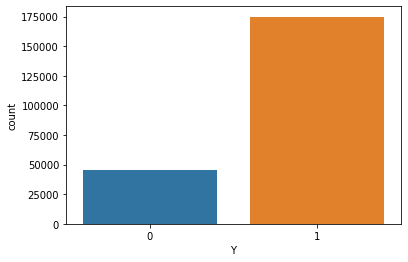

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# Plota quantidade de amostras de cada classe
fig, ax = plt.subplots()
sns.countplot("Y", data=df, ax=ax)
plt.show()

Para ter a noção de como as variáveis estão distribuídas, vamos plotar o histograma de todas as variáveis numéricas, excluindo a coluna **ID**, uma vez que ela não acrescenta nenhuma informação importante.
Observe como valores de algumas variáveis estão mais bem distribuídos em torno de uma média e outras tendem a puxar o histograma para a esquerda.

In [0]:
# Visualizar a distribuição dos dados. Talvez PCA + t-SNE.
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

## Preparação dos Dados

In [0]:
# Remove a coluna "ID"
df.pop("ID")
# Remove as colunas que possuem pelo menos um elemento "NA"
df.dropna(axis=1, how="any", inplace=True)

print(df.head())
#print(df.describe())
print("Total de registros:", len(df))

   Y  v1  v2  v3  v4  v5  v6  v7  v8  v9  ...  v60  v62  v64  v66  v68  v70  \
0  0   0   0   0   0   0   0   0   0   0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
1  1   0   0   0   0   0   0   0   0   0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2  1   0   0   0   0   0   0   0   0   0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
3  1   0   0   0   0   0   0   0   0   0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
4  1   0   0   0   0   0   0   0   1   1  ...  0.0  0.0  0.0  0.0  0.0  0.0   

      v72    v74    v76     v78  
0     0.0    0.0    0.0     0.0  
1     0.0    0.0    0.0     0.0  
2  2255.0  450.0  300.0  1720.4  
3     0.0    0.0    0.0     0.0  
4     0.0    0.0    0.0  3076.0  

[5 rows x 196 columns]
Total de registros: 219984


## Subamostragem

Realiza subamostagem (downsample) na base de dados desbalanceada.

In [0]:
from sklearn.utils import resample

def downsample(n_samples):

  # Separa em classe majoritária e minoritária
  df_majority = df[df.Y == 1] # inadimplentes
  df_minority = df[df.Y == 0] # realizaram pagamento
  
  # Subamostra a classe majoritária
  df_majority_downsampled = resample(df_majority, 
                                  replace=False,
                                  n_samples=n_samples,
                                  random_state=1) 
  
  # Combina a classe minoritária com a classe majoritária subamostrada
  df_downsampled = pd.concat([df_majority_downsampled, df_minority])
  return df_downsampled

In [0]:
# Conta o número de amostras de cada classe
print(df["Y"].value_counts())

df_downsampled = downsample(n_samples=45063)
df_downsampled.reset_index(inplace=True, drop=True) 

# Mostra a nova contagem de amostras
print(df_downsampled.Y.value_counts())

1    174921
0     45063
Name: Y, dtype: int64
1    45063
0    45063
Name: Y, dtype: int64


## Pré-Processamento

Separa classes e características em X e y, respectivamente.

In [0]:
# Separa as classes e características
y = df_downsampled.pop("Y")
X = df_downsampled

print(X.head())
print(y.head())

   v1  v2  v3  v4  v5  v6  v7  v8  v9  v10  ...  v60  v62     v64     v66  \
0   0   0   0   0   0   0   0   0   0    0  ...  0.0  0.0  1376.0  1376.0   
1   0   0   0   0   0   0   0   0   0    0  ...  0.0  0.0     0.0     0.0   
2   0   0   0   0   0   0   0   0   0    0  ...  0.0  0.0     0.0     0.0   
3   0   0   0   0   0   0   0   0   0    0  ...  0.0  0.0     0.0     0.0   
4   0   0   0   0   0   0   0   0   0    0  ...  0.0  0.0     0.0     0.0   

   v68  v70      v72      v74  v76     v78  
0  0.0  0.0  3986.00  2376.00  0.0     0.0  
1  0.0  0.0     0.00     0.00  0.0     0.0  
2  0.0  0.0  4163.98  1536.98  0.0  2800.0  
3  0.0  0.0   712.50     0.00  0.0   850.0  
4  0.0  0.0     0.00     0.00  0.0     0.0  

[5 rows x 195 columns]
0    1
1    1
2    1
3    1
4    1
Name: Y, dtype: int64


Aplica normalização em X.

In [0]:
#from sklearn.preprocessing import StandardScaler
#std_scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

# Normalização
X = minmax_scaler.fit_transform(X)

## Seleção de Características

Seleção de características com método Embedded baseado em Árvore de Decisão.

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

# Cria floresta
forest = ExtraTreesClassifier(n_estimators=100, random_state=1)

forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Imprime o ranking de importância das características
print("Ranking de características:")
for f in range(X.shape[1]):
    print("%d. característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Ranking de características:
1. característica 165 (0.114208)
2. característica 164 (0.047332)
3. característica 167 (0.045820)
4. característica 169 (0.038121)
5. característica 170 (0.035280)
6. característica 168 (0.021599)
7. característica 74 (0.021530)
8. característica 75 (0.017300)
9. característica 82 (0.015723)
10. característica 79 (0.015084)
11. característica 115 (0.014211)
12. característica 114 (0.014035)
13. característica 117 (0.013449)
14. característica 83 (0.013424)
15. característica 116 (0.012661)
16. característica 86 (0.011869)
17. característica 84 (0.011393)
18. característica 78 (0.011097)
19. característica 85 (0.010557)
20. característica 87 (0.009888)
21. característica 143 (0.009683)
22. característica 145 (0.009646)
23. característica 144 (0.009166)
24. característica 88 (0.009143)
25. característica 102 (0.009123)
26. característica 142 (0.009034)
27. característica 89 (0.008933)
28. característica 158 (0.008912)
29. característica 80 (0.008170)
30. cara

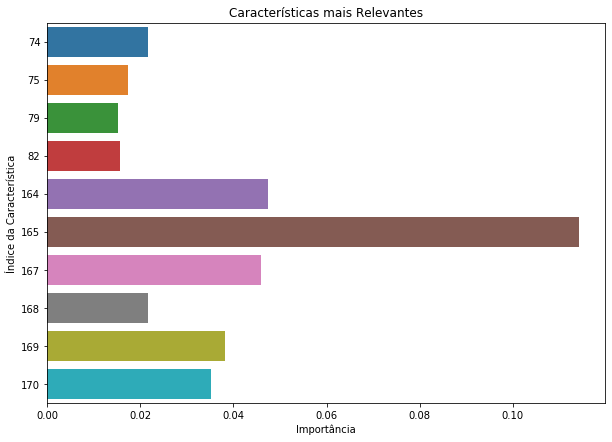

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# Plota as 10 características mais relevantes
feature_importances = pd.Series(data=importances[indices[:10]], index=indices[:10])
plt.figure(figsize=(10, 7))
sns.barplot(x=feature_importances, y=feature_importances.index, orient="h").set_title("Características mais Relevantes")
plt.xlabel("Importância")
plt.ylabel("Índice da Característica")
#plt.savefig("caracteristicas.png")
plt.show()

In [0]:
print("Número de características as antes da seleção:", X.shape[1])

# Seleção de características
model = SelectFromModel(forest, prefit=True)
X = model.transform(X)

print("Número de características selecionadas:", X.shape[1])

Número de características as antes da seleção: 195
Número de características selecionadas: 56


## Separa os Dados em Treinamento, Validação e Teste

A base de dados deve ser dividida em 50%, 20% e 30% para treinamento, validação e teste, respectivamente. 

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=1)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.4, stratify=y_test, random_state=1)

print("X:", X.shape)
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)

X: (90126, 56)
X_train: (45063, 56)
X_val: (18026, 56)
X_test: (27037, 56)


## Treinamento e Validação

### LDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

### Naïve Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Regressão Logística

In [0]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver="liblinear")
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Árvore de Decisão

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=1)
params_tree = {"max_depth": np.arange(5, 10),
               "min_samples_leaf": [20, 50, 100]}

tree_gs = GridSearchCV(tree, params_tree, cv=5)
tree_gs.fit(X_train, y_train)

tree_best = tree_gs.best_estimator_
print(tree_best) # max_depth = 8, min_samples_leaf = 50

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')


### kNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

params_knn = {"n_neighbors": np.arange(10, 15)}

knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, y_train)

knn_best = knn_gs.best_estimator_
print(knn_best) # n_neighbors = 13

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

params_rf = {"n_estimators": [150, 200, 250]}

rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)

rf_best = rf_gs.best_estimator_
print(rf_best) # n_estimators = 200

/home/matheusbosa/Dev/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


Resultados individuais dos classificadores na base de validação.

In [0]:
print("lda: {}".format(lda.score(X_val, y_val)))
print("nb: {}".format(nb.score(X_val, y_val)))
print("log: {}".format(log.score(X_val, y_val)))
print("tree: {}".format(tree_best.score(X_val, y_val)))
print("knn: {}".format(knn_best.score(X_val, y_val)))
print("rf: {}".format(rf_best.score(X_val, y_val)))

lda: 0.5924775324531233
nb: 0.5517585709530678
log: 0.5917008765117053
tree: 0.6059580605791635
knn: 0.580938644180628
rf: 0.6048485520914235


### Combinação de Classificadores

In [0]:
# Combinando os 3 melhores classificadores
estimators = [("lda", lda), ("tree_best", tree_best), ("rf_best", rf_best)]

from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators, weights=[1, 2, 1], voting="soft")

ensemble.fit(X_train, y_train)
print("Acurácia:", ensemble.score(X_val, y_val))

Acurácia: 0.6143348496615999


## Resultados

Resultados finais do classificador com melhor desempenho individual (Árvore de Decisão).

Acurácia: 0.6115323445648556
              precision    recall  f1-score   support

           0       0.63      0.54      0.58     13518
           1       0.60      0.68      0.64     13519

    accuracy                           0.61     27037
   macro avg       0.61      0.61      0.61     27037
weighted avg       0.61      0.61      0.61     27037

[[7334 6184]
 [4319 9200]]


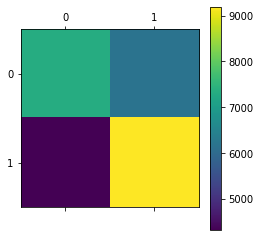

In [0]:
# Predição
y_pred = tree_best.predict(X_test)
print("Acurácia:", tree_best.score(X_test, y_test))

# Resultados
import sklearn.metrics as metrics
target_names = ["0", "1"]
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

# Calcula a matriz de confusão
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

# Plota matriz de confusão
import pylab as pl

pl.matshow(cm)
pl.colorbar()
pl.savefig("cm_individual.png")
pl.show()

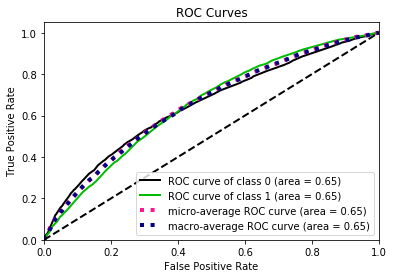

In [0]:
# Plota curva ROC
#!pip install scikit-plot
import scikitplot as skplt

y_probs = tree_best.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probs)
pl.savefig("roc_individual.png")
plt.show()

Resultados finais obtidos com múltiplos classificadores.

Acurácia: 0.624033731553057
              precision    recall  f1-score   support

           0       0.64      0.56      0.60     13518
           1       0.61      0.69      0.65     13519

    accuracy                           0.62     27037
   macro avg       0.63      0.62      0.62     27037
weighted avg       0.63      0.62      0.62     27037

[[7543 5975]
 [4190 9329]]


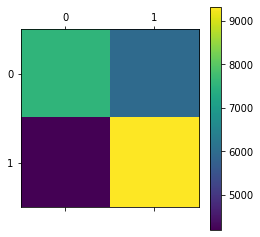

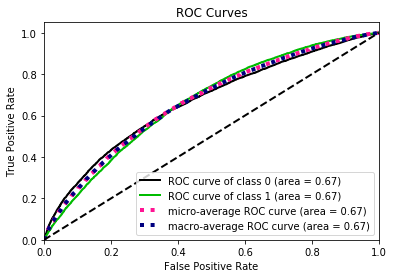

In [0]:
# Predição
y_pred = ensemble.predict(X_test)
print("Acurácia:", ensemble.score(X_test, y_test))

# Resultados
target_names = ["0", "1"]
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

# Calcula matriz de confusão
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

# Plota matriz de confusão
pl.matshow(cm)
pl.colorbar()
pl.savefig("cm_ensemble.png")
pl.show()

# Plota curva ROC
y_probs = ensemble.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probs)
plt.savefig("roc_ensemble.png")
plt.show()

Plota as probabilidades dos classificadores para uma amostra de exemplo.

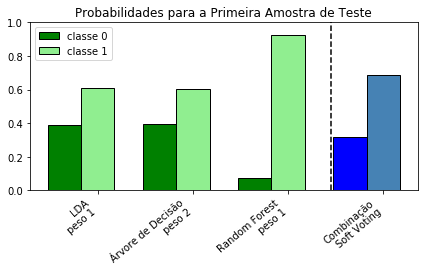

In [0]:
# Predição de todos os classificadores
probas = [c.fit(X_test, y_test).predict_proba(X) for c in (lda, tree_best, rf_best, ensemble)]

# Calcula as probabilidades para a primeira amostra de teste
class0_1 = [pr[0, 0] for pr in probas]
class1_1 = [pr[0, 1] for pr in probas]


# Plota as probabilidades para amostra 1

N = 4 # número de grupos
ind = np.arange(N) # posições dos grupos
width = 0.35 # largura das barras

fig, ax = plt.subplots()

# Barras dos classificadores
p1 = ax.bar(ind, np.hstack(([class0_1[:-1], [0]])), width,
            color="green", edgecolor="k")
p2 = ax.bar(ind + width, np.hstack(([class1_1[:-1], [0]])), width,
            color="lightgreen", edgecolor="k")

# Barras do ensemble
p3 = ax.bar(ind, [0, 0, 0, class0_1[-1]], width,
            color="blue", edgecolor="k")
p4 = ax.bar(ind + width, [0, 0, 0, class1_1[-1]], width,
            color="steelblue", edgecolor="k")

# Anotações
plt.axvline(2.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(["LDA\npeso 1",
                    "Árvore de Decisão\npeso 2",
                    "Random Forest\npeso 1",
                    "Combinação\nSoft Voting"],
                   rotation=40,
                   ha="right")
plt.ylim([0, 1])
plt.title("Probabilidades para a Primeira Amostra de Teste")
plt.legend([p1[0], p2[0]], ["classe 0", "classe 1"], loc="upper left")
plt.tight_layout()
plt.savefig("probs.png")
plt.show()